## Quantum Tunneling Simulation for ES 170

### This code simulates quantum mechanical tunneling of an electron across a square potential barrier. The electron is represented by a 1D Gaussian wavefunction. 1D time-dependent Schrodinger equation is solved using the finite-difference time-domain method

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt

In [3]:
# Class for QMT FDTD
class QMfdtd:
    def __init__(self, V0, ke, bw, sig):
        self.V0 = V0 * sc.value('electron volt')  # height of potential barrier in Joules
        self.ke = ke * sc.value('electron volt')  # kinetic energy of electron in Joules
        self.omega = self.ke / sc.hbar  # frequency of electron
        self.k0 = np.sqrt(self.ke * 2 * sc.m_e / (sc.hbar**2))  # wave vector of electron in m^-1
        self.bw = bw * sc.value('Angstrom star')  # potential barrier width in m
        self.sig = sig * sc.value('Angstrom star')  # Initial spread of Gaussian wavefunction
        self.dx = self.bw / 25.0  # grid cell size
        self.dt = 0.9 * sc.hbar / ((sc.hbar**2/(sc.m_e * self.dx**2)) + (self.V0 / 2.0))  # time step size
        self.ll = 3000  # total number of grid points in the domain
        self.tt = 5*self.ll  # total number of time steps in the simulation
        self.length = self.ll * self.dx  # length of the simulation domain
        self.lx = np.linspace(0.0, self.length, self.ll)  # 1D position vector along x
        # update coefficients
        self.c1 = sc.hbar * self.dt / (2.0 * sc.m_e * self.dx**2)
        self.c2 = self.dt / sc.hbar
        # wavefunction arrays
        self.psir = np.zeros((self.ll))
        self.psii = np.zeros((self.ll))  
        self.psimag = np.zeros(self.ll)
        ac = 1.0 / np.sqrt((np.sqrt(np.pi)) * self.sig)
        x0 = 8 * self.sig
        psigauss = ac * np.exp(-(self.lx - x0)**2 / (2.0 * self.sig**2))
        self.psir = psigauss * np.cos(self.k0 * self.lx)
        self.psii = psigauss * np.sin(self.k0 * self.lx)
        self.psimag = self.psir**2 + self.psii**2
        # potential barrier
        self.Vx = np.zeros(self.ll)
        bwgrid = round(self.bw/(2.0 * self.dx))
        bposgrid = round(self.ll/2.0)
        bl = bposgrid - bwgrid
        br = bposgrid + bwgrid
        self.Vx[bl:br] = self.V0

    def fdtd_update(self):
        self.psii[1:self.ll - 1] = (self.c1 * (self.psir[2:self.ll] - 2.0 * self.psir[1:self.ll - 1]
                                    + self.psir[0:self.ll - 2]) 
                                    - self.c2 * self.Vx[1:self.ll - 1] * self.psir[1:self.ll - 1]
                                    + self.psii[1:self.ll - 1])
        self.psir[1:self.ll - 1] = (-self.c1 * (self.psii[2:self.ll] - 2.0 * self.psii[1:self.ll - 1]
                                    + self.psii[0:self.ll - 2]) 
                                    + self.c2 * self.Vx[1:self.ll - 1] * self.psii[1:self.ll - 1]
                                    + self.psir[1:self.ll - 1])
        self.psimag = self.psir**2 + self.psii**2

In [4]:
def run_sim():
    q1 = QMfdtd(600, 500, 0.25, 0.8)
    print('Potential barrier =', round(q1.V0 / sc.value('electron volt'), 2), 'eV')
    print('Electron energy =', round(q1.ke / sc.value('electron volt'), 2), 'eV')
    print('Potential barrier width =', round(q1.bw / sc.value('Angstrom star'), 2), 'A')
    print('Grid size =', round(q1.dx / sc.value('Angstrom star'), 2), 'A')
    print('Time step =', "%.2e" % (q1.dt * 1e15), 'fs')
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    ax1.set_xlabel('position (A)')
    ax1.set_ylabel('norm magnitude')
    plt.ion()
    fig1.show()
    fig1.canvas.draw()
    for nn in range(0, q1.tt):
        q1.fdtd_update()
        if nn % 50 == 0:
            tstr = 'Time = ' + str(round(nn * q1.dt * 1e15, 4)) + ' fs'
            ax1.clear()
            ax1.plot(q1.lx / sc.value('Angstrom star'), q1.psimag / np.amax(q1.psimag))
            ax1.plot(q1.lx / sc.value('Angstrom star'), q1.Vx / np.amax(q1.Vx))
            ax1.set_title(tstr)
            ax1.set_xlabel('position (A)')
            ax1.set_ylabel('norm magnitude')
            fig1.canvas.draw()

Potential barrier = 600.0 eV
Electron energy = 500.0 eV
Potential barrier width = 0.25 A
Grid size = 0.01 A
Time step = 7.74e-06 fs


<IPython.core.display.Javascript object>


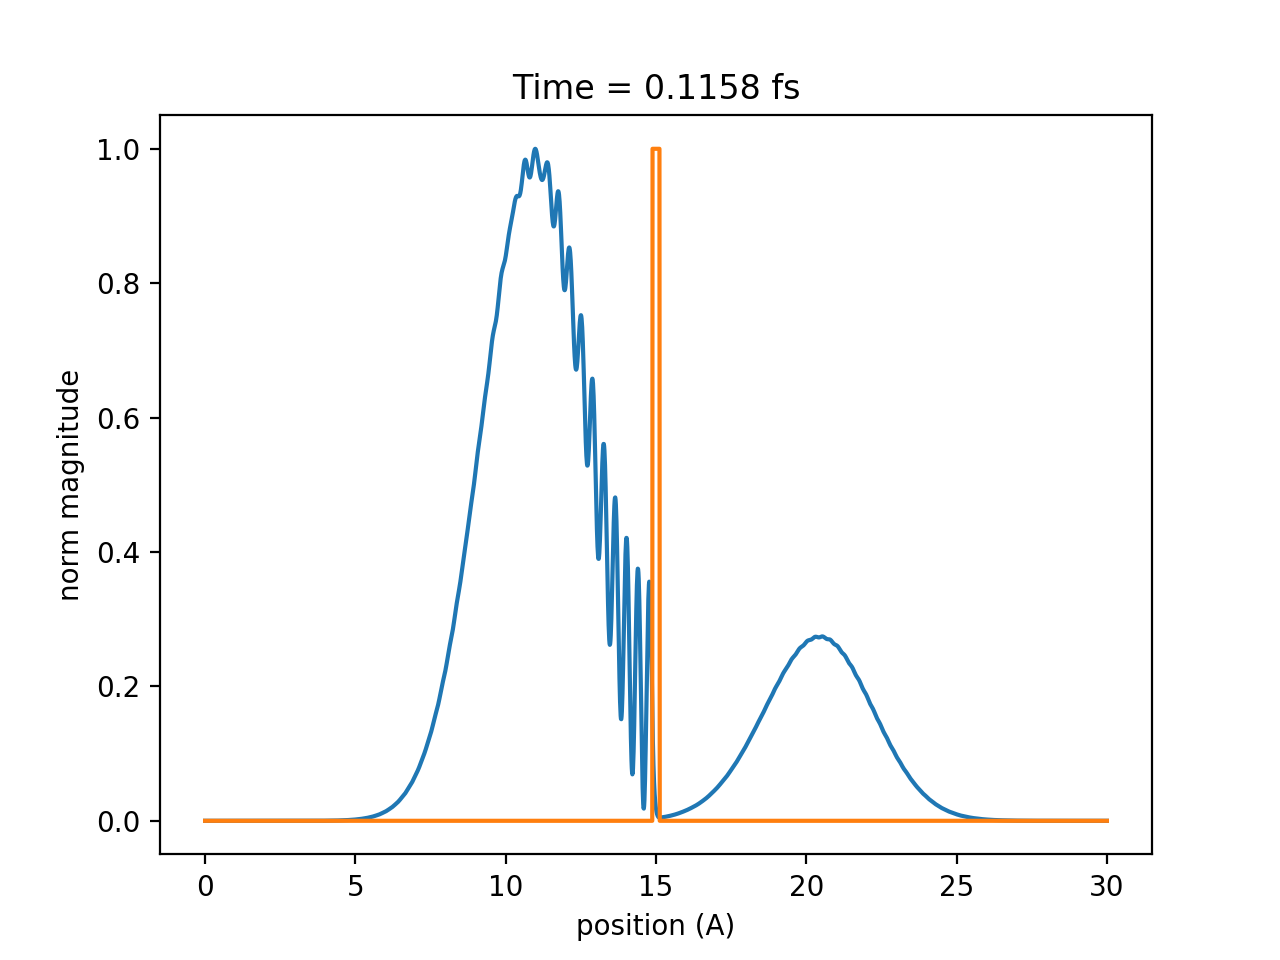

In [5]:
run_sim()